In [2]:
import csv
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import random
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
filename = '/Users/Hitesh Aryan Acharya/Desktop/OnlineClass/3-1/FoDS/insurance_dataset.csv'
ds = pd.read_csv(filename)
ds = ds.drop(['children'], axis = 1)
ds = ds.to_numpy()

In [31]:
def dataset(ds, degree):    
    np.random.shuffle(ds)
    y = ds[:, -1]
    y = np.reshape(y, (1338, 1))
    x = ds[:, 0:2]
    poly = PolynomialFeatures(degree)
    x_poly = poly.fit_transform(x)
    data = np.hstack((x_poly, y))
    return data

In [32]:
def standardize(degree):
    data = dataset(ds, degree)
    bias = data[:, 0]
    bias = np.reshape(bias, (1338, 1))
    feature = data[:, 1:]
    mu = np.mean(feature, axis = 0)
    sigma = np.std(feature, axis = 0)
    feature = (feature - mu)/sigma
    data = np.hstack((bias, feature))
    return data, mu, sigma

In [33]:
def gradientD(degree, lambd, d, iterations, val):
    data, mu, sigma = standardize(degree)
    train_count = int(0.7*len(data))
    valid_count = int(0.9*len(data))
    x = data[:train_count, :-1]
    y = data[:train_count, -1]
    learn_rate = 0.00001
    costs = []
    w = np.zeros(len(x[0]))
    
    if(d == 0):            #polynomial regression
        
        for i in range(iterations):
            delE = np.dot(np.dot(x, w) - y, x)
            cost = np.mean(np.square(np.dot(x, w) - y))/2
            costs.append(cost)
            if(val and i % 50 == 0):
                print('{} : {}'.format(i, costs[-1]))
            w -= learn_rate*delE

        x_valid = data[train_count: valid_count, :-1]
        y_valid = data[train_count: valid_count, -1]
        cost_valid = np.mean(np.square(np.dot(x_valid, w) - y_valid))/2
        if(val):    
            print()
            print("The validation error is : {}".format(cost_valid))
        
        x_test = data[valid_count:, :-1]
        y_test = data[valid_count:, -1]
        cost_test = np.mean(np.square(np.dot(x_test, w) - y_test))/2
        if(val):    
            print()
            print("The testing error is : {}".format(cost_test))
        
        return w, cost_valid, cost_test
    
    if(d == 1):            #ridge refresion
        
        for i in range(iterations):
            delE = np.dot(np.dot(x, w) - y, x)
            cost = np.mean(np.square(np.dot(x, w) - y))/2
            costs.append(cost)
            if(val and i % 50 == 0):
                print('{} : {}'.format(i, costs[-1]))
            w -= learn_rate*(delE + 2*lambd*w)

        x_valid = data[train_count: valid_count, :-1]
        y_valid = data[train_count: valid_count, -1]
        cost_valid = np.mean(np.square(np.dot(x_valid, w) - y_valid))/2
        if(val):    
            print()
            print("The validation error is : {}".format(cost_valid))

        
        x_test = data[valid_count:, :-1]
        y_test = data[valid_count:, -1]
        cost_test = np.mean(np.square(np.dot(x_test, w) - y_test))/2
        if(val):    
            print()
            print("The testing error is : {}".format(cost_test))

        return w, cost_valid, cost_test
    
    if(d == 2):            #lasso refression
        
        for i in range(iterations):
            delE = np.dot(np.dot(x, w) - y, x)
            cost = np.mean(np.square(np.dot(x, w) - y))/2
            costs.append(cost)
            if(val and i % 50 == 0):
                print('{} : {}'.format(i, costs[-1]))
            w -= learn_rate*(delE + lambd*np.sign(w))

        x_valid = data[train_count: valid_count, :-1]
        y_valid = data[train_count: valid_count, -1]
        cost_valid = np.mean(np.square(np.dot(x_valid, w) - y_valid))/2
        if(val):    
            print()
            print("The validation error is : {}".format(cost_valid))
        
        x_test = data[valid_count:, :-1]
        y_test = data[valid_count:, -1]
        cost_test = np.mean(np.square(np.dot(x_test, w) - y_test))/2
        if(val):    
            print()
            print("The testing error is : {}".format(cost_test))
        
        return w, cost_valid, cost_test

In [37]:
def stochasticGD(degree, lambd, d, iterations, val):
    data, mu, sigma = standardize(degree)
    train_count = int(0.7*len(data))
    valid_count = int(0.9*len(data))
    x = data[:train_count, :-1]
    y = data[:train_count, -1]
    learn_rate = 0.00001
    costs = []
    w = np.zeros(len(x[0]))
    
    if(d == 0):            #polynomial regression
        
        for i in range(iterations):
            p = random.randrange(0, train_count)
            delE = np.dot(np.dot(x[p], w) - y[p], x[p])
            cost = np.mean(np.square(np.dot(x, w) - y))/2
            costs.append(cost)
            if(val and i % 50 == 0):
                print('{} : {}'.format(i, costs[-1]))
            w -= learn_rate*delE

        x_valid = data[train_count: valid_count, :-1]
        y_valid = data[train_count: valid_count, -1]
        cost_valid = np.mean(np.square(np.dot(x_valid, w) - y_valid))/2
        if(val):    
            print()
            print("The validation error is : {}".format(cost_valid))
        
        x_test = data[valid_count:, :-1]
        y_test = data[valid_count:, -1]
        cost_test = np.mean(np.square(np.dot(x_test, w) - y_test))/2
        if(val):    
            print()
            print("The testing error is : {}".format(cost_test))
        
        return w, cost_valid, cost_test
    
    if(d == 1):            #ridge refresion
        
        for i in range(iterations):
            p = random.randrange(0, train_count)
            delE = np.dot(np.dot(x[p], w) - y[p], x[p])
            cost = np.mean(np.square(np.dot(x, w) - y))/2
            costs.append(cost)
            if(val and i % 50 == 0):
                print('{} : {}'.format(i, costs[-1]))
            w -= learn_rate*(delE + 2*lambd*w)

        x_valid = data[train_count: valid_count, :-1]
        y_valid = data[train_count: valid_count, -1]
        cost_valid = np.mean(np.square(np.dot(x_valid, w) - y_valid))/2
        if(val):    
            print()
            print("The validation error is : {}".format(cost_valid))
        
        x_test = data[valid_count:, :-1]
        y_test = data[valid_count:, -1]
        cost_test = np.mean(np.square(np.dot(x_test, w) - y_test))/2
        if(val):    
            print()
            print("The testing error is : {}".format(cost_test))
        
        return w, cost_valid, cost_test
    
    if(d == 2):            #lasso refresion
        
        for i in range(iterations):
            p = random.randrange(0, train_count)
            delE = np.dot(np.dot(x[p], w) - y[p], x[p])
            cost = np.mean(np.square(np.dot(x, w) - y))/2
            costs.append(cost)
            if(val and i % 50 == 0):
                print('{} : {}'.format(i, costs[-1]))
            w -= learn_rate*(delE + lambd*np.sign(w))

        x_valid = data[train_count: valid_count, :-1]
        y_valid = data[train_count: valid_count, -1]
        cost_valid = np.mean(np.square(np.dot(x_valid, w) - y_valid))/2
        if(val):    
            print()
            print("The validation error is : {}".format(cost_valid))
        
        x_test = data[valid_count:, :-1]
        y_test = data[valid_count:, -1]
        cost_test = np.mean(np.square(np.dot(x_test, w) - y_test))/2
        if(val):    
            print()
            print("The testing error is : {}".format(cost_test))
        
        return w, cost_valid, cost_test

In [35]:
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in degrees:
    print('Training and testing error in polynomial regression for degree {}'.format(i))
    print()
    gradientD(i, 0, 0, 500, True)
    print('------------------------------------------------')

Training and testing error in polynomial regression for degree 1

0 : 0.49836507929828106
50 : 0.4605084398564741
100 : 0.44713702656788024
150 : 0.442411884477233
200 : 0.4407412038358384
250 : 0.44015010622721773
300 : 0.43994080720624407
350 : 0.43986662788194575
400 : 0.43984030800527
450 : 0.4398309569233027

The validation error is : 0.4802276224085209

The testing error is : 0.3753360382564934
------------------------------------------------
Training and testing error in polynomial regression for degree 2

0 : 0.5002270209938354
50 : 0.43460882969186226
100 : 0.43125977693932016
150 : 0.43106107687108525
200 : 0.43102770073979185
250 : 0.4310051674966638
300 : 0.43098432085600746
350 : 0.43096422627886716
400 : 0.43094466079769383
450 : 0.4309255422647152

The validation error is : 0.47686573524358283

The testing error is : 0.453694526387021
------------------------------------------------
Training and testing error in polynomial regression for degree 3

0 : 0.4610899002297565


In [38]:
for i in degrees:
    print('Training and testing error in polynomial regression for degree {}'.format(i))
    print()
    stochasticGD(i, 0, 0, 500, True)
    print('------------------------------------------------')

Training and testing error in polynomial regression for degree 1

0 : 0.4821913595142157
50 : 0.48214846118873844
100 : 0.48205937457494863
150 : 0.4820141052529138
200 : 0.481969908428374
250 : 0.48193023183646616
300 : 0.48188961010634696
350 : 0.4817942603124698
400 : 0.4817569618983464
450 : 0.4817056036365333

The validation error is : 0.5744325745992401

The testing error is : 0.4735900704754674
------------------------------------------------
Training and testing error in polynomial regression for degree 2

0 : 0.49830225175948595
50 : 0.49806462912993854
100 : 0.49774596433128654
150 : 0.4976498167418622
200 : 0.4973269137937701
250 : 0.4972277239708193
300 : 0.4970604399679634
350 : 0.49697748265357444
400 : 0.4967963472614244
450 : 0.4967090804080441

The validation error is : 0.46635617802898827

The testing error is : 0.5745474207452748
------------------------------------------------
Training and testing error in polynomial regression for degree 3

0 : 0.5156525658204605
5

In [9]:
w, valid_error, test_error, stor_r = [[[0]*10 for x in range(10)] for x in range(2)], [[[0]*10 for x in range(10)] for x in range(2)], [[[0]*10 for x in range(10)] for x in range(2)], [[[0]*10 for x in range(10)] for x in range(2)]
for j in range(1,3):
    for i in degrees:
        for k in range(10):
            r = random.uniform(0, 1)
            if(j == 1):    
                print('Training, validation and testing error in ridge regression for degree {} and regularisation parameter {}'.format(i, r))
            if(j == 2):    
                print('Training, validation and testing error in lasso regression for degree {} and regularisation parameter {}'.format(i, r))
            print()
            w[j-1][i-1][k], valid_error[j-1][i-1][k], test_error[j-1][i-1][k] = gradientD(i, r, j, 500, True)
            stor_r[j-1][i-1][k] = r
            print('------------------------------------------------')

Training, validation and testing error in ridge regression for degree 1 and regularisation parameter 0.33887401948980955

0 : 0.5015221819384216
50 : 0.46611377093583584
100 : 0.453276739724328
150 : 0.44860264872026817
200 : 0.4468922617599959
250 : 0.44626274145570194
300 : 0.4460294554609202
350 : 0.4459422963442974
400 : 0.4459094061750542
450 : 0.44589683931077423

The validation error is : 0.47416015226928404

The testing error is : 0.3462631958198738
------------------------------------------------
Training, validation and testing error in ridge regression for degree 1 and regularisation parameter 0.4006119909952084

0 : 0.4991804391410992
50 : 0.4638164187389704
100 : 0.451310792929675
150 : 0.4468564111922942
200 : 0.44525552042718775
250 : 0.444673794876626
300 : 0.4444595616344459
350 : 0.4443793872339809
400 : 0.44434880557283507
450 : 0.444336877425653

The validation error is : 0.49905578630369835

The testing error is : 0.30984821105585447
-------------------------------


The testing error is : 0.44533786041723344
------------------------------------------------
Training, validation and testing error in ridge regression for degree 2 and regularisation parameter 0.17493185475163464

0 : 0.5096706485957375
50 : 0.4536104526323876
100 : 0.45041119590566014
150 : 0.4502099909184364
200 : 0.4501825097660716
250 : 0.45016661245348855
300 : 0.45015220881618323
350 : 0.450138379119404
400 : 0.45012493461855846
450 : 0.4501118083388047

The validation error is : 0.3749451793083873

The testing error is : 0.5158091328986523
------------------------------------------------
Training, validation and testing error in ridge regression for degree 2 and regularisation parameter 0.8047594492285379

0 : 0.44724349568891164
50 : 0.4010647496232146
100 : 0.3984644721060387
150 : 0.39822201550326547
200 : 0.3981443276694038
250 : 0.3980921533987545
300 : 0.398048300580815
350 : 0.3980080144784326
400 : 0.39796953896436627
450 : 0.39793218516672824

The validation error is :

150 : 0.4389760403226497
200 : 0.43877334816305863
250 : 0.43859668180049693
300 : 0.4384411820138346
350 : 0.43830359011704945
400 : 0.43818145475666304
450 : 0.4380727966715314

The validation error is : 0.44395050040440787

The testing error is : 0.46666651336950876
------------------------------------------------
Training, validation and testing error in ridge regression for degree 4 and regularisation parameter 0.26467683615952975

0 : 0.5145692596019608
50 : 0.4533610339860616
100 : 0.45312012721953826
150 : 0.45291883868083715
200 : 0.45274162862141465
250 : 0.4525839607032697
300 : 0.45244298273358957
350 : 0.4523165986137163
400 : 0.4522031192287467
450 : 0.45210111326516905

The validation error is : 0.4277135715031919

The testing error is : 0.40027065236272513
------------------------------------------------
Training, validation and testing error in ridge regression for degree 4 and regularisation parameter 0.32427634687834483

0 : 0.49642483869093096
50 : 0.435930272975501

400 : 0.4310873335630437
450 : 0.4309683396613856

The validation error is : 0.4568960758071705

The testing error is : 0.4827788596017994
------------------------------------------------
Training, validation and testing error in ridge regression for degree 6 and regularisation parameter 0.34789673704385227

0 : 0.5008239582505449
50 : 0.4358035614938731
100 : 0.43418501513563057
150 : 0.43311304418558916
200 : 0.43239678180878827
250 : 0.43191441861618746
300 : 0.43158709775993714
350 : 0.4313633202958968
400 : 0.43120917869064085
450 : 0.43110217664260697

The validation error is : 0.4886692406568539

The testing error is : 0.415086306444249
------------------------------------------------
Training, validation and testing error in ridge regression for degree 6 and regularisation parameter 0.6207119481737923

0 : 0.49219187193698427
50 : 0.43623820859898577
100 : 0.4348771229404899
150 : 0.43397952868887624
200 : 0.4333803668542513
250 : 0.4329766899029104
300 : 0.4327025357175336
350

400 : 0.4263695233205062
450 : 0.42626859594445654

The validation error is : 0.4421087480078471

The testing error is : 0.5500159535425873
------------------------------------------------
Training, validation and testing error in ridge regression for degree 7 and regularisation parameter 0.8399189854771719

0 : 0.48548365748211675
50 : 0.43855829179010086
100 : 0.4363834996669439
150 : 0.4352178889315883
200 : 0.43458577442197394
250 : 0.43423726736159257
300 : 0.43404045866170265
350 : 0.43392536929096837
400 : 0.43385468011190065
450 : 0.4338083781553019

The validation error is : 0.48867394441311773

The testing error is : 0.4121473921008305
------------------------------------------------
Training, validation and testing error in ridge regression for degree 7 and regularisation parameter 0.5829813181746535

0 : 0.49956421814793767
50 : 0.4424301358873012
100 : 0.43952019267035825
150 : 0.43784729451064897
200 : 0.4368783284712168
250 : 0.43631232989932567
300 : 0.435978258676828
3

The validation error is : 0.38652480283016893

The testing error is : 0.4430895432537957
------------------------------------------------
Training, validation and testing error in ridge regression for degree 9 and regularisation parameter 0.36018810663425116

0 : 0.49388225559719334
50 : 0.4396531134521332
100 : 0.43643025214879294
150 : 0.43535825900167724
200 : 0.43492576262790666
250 : 0.434698993528693
300 : 0.4345482448232013
350 : 0.4344323974117195
400 : 0.4343370719362911
450 : 0.43425633116113843

The validation error is : 0.4753060253905266

The testing error is : 0.41320641588932683
------------------------------------------------
Training, validation and testing error in ridge regression for degree 9 and regularisation parameter 0.2955529383333212

0 : 0.4786251847666868
50 : 0.4292300643042491
100 : 0.42726943032474146
150 : 0.4266565374289255
200 : 0.42644849715141764
250 : 0.4263657757152453
300 : 0.42632337838294476
350 : 0.42629477844012686
400 : 0.4262714565366889
450

50 : 0.4675465740162558
100 : 0.4542692901376848
150 : 0.44947166243302594
200 : 0.4477238121304805
250 : 0.4470799973146568
300 : 0.4468392648845741
350 : 0.4467473789462326
400 : 0.4467113106125907
450 : 0.44669661793272775

The validation error is : 0.4193232780472369

The testing error is : 0.44997335369783475
------------------------------------------------
Training, validation and testing error in lasso regression for degree 1 and regularisation parameter 0.2377699289603299

0 : 0.4775296311213698
50 : 0.44047395633032793
100 : 0.4276086178236951
150 : 0.4231043446917745
200 : 0.42151104246276355
250 : 0.4209403367981599
300 : 0.4207328260480625
350 : 0.42065603287283393
400 : 0.4206270322865328
450 : 0.4206158280788488

The validation error is : 0.518586015777849

The testing error is : 0.4343626961668327
------------------------------------------------
Training, validation and testing error in lasso regression for degree 1 and regularisation parameter 0.25834683109358936

0 : 0

400 : 0.4486151258966944
450 : 0.44861296692822716

The validation error is : 0.4143985178780332

The testing error is : 0.4539262131819962
------------------------------------------------
Training, validation and testing error in lasso regression for degree 3 and regularisation parameter 0.9948479091914257

0 : 0.4932619304762199
50 : 0.43503314143209226
100 : 0.43481858975591603
150 : 0.43480216840517516
200 : 0.4347885982816344
250 : 0.43477588197121064
300 : 0.43476378629940404
350 : 0.4347522168808788
400 : 0.434741118766542
450 : 0.4347304548219331

The validation error is : 0.47121336729364943

The testing error is : 0.438644795935048
------------------------------------------------
Training, validation and testing error in lasso regression for degree 3 and regularisation parameter 0.437574709537659

0 : 0.5096806726794754
50 : 0.45079832538672354
100 : 0.45047902843296306
150 : 0.45041088342840524
200 : 0.45035480440882014
250 : 0.45030273097452145
300 : 0.4502533690219689
350 

250 : 0.4434846028759463
300 : 0.44314489023624654
350 : 0.44283898465415855
400 : 0.44256930473864964
450 : 0.4423247489909537

The validation error is : 0.4610342691194663

The testing error is : 0.3966238573439919
------------------------------------------------
Training, validation and testing error in lasso regression for degree 4 and regularisation parameter 0.9237513066888194

0 : 0.5414320965424156
50 : 0.4775093001665763
100 : 0.4767258185193407
150 : 0.476092811102235
200 : 0.4755353858287707
250 : 0.4750398622662061
300 : 0.4745911086891779
350 : 0.47417893166488473
400 : 0.47379928264904925
450 : 0.4734490202114797

The validation error is : 0.36940911689839373

The testing error is : 0.3706941292262136
------------------------------------------------
Training, validation and testing error in lasso regression for degree 4 and regularisation parameter 0.973351179282892

0 : 0.5060226458085231
50 : 0.44096595001348365
100 : 0.44034323413426224
150 : 0.4398073114164254
200 : 0

The validation error is : 0.46351889119113754

The testing error is : 0.4610017998713793
------------------------------------------------
Training, validation and testing error in lasso regression for degree 6 and regularisation parameter 0.9351701650436899

0 : 0.5238397515619652
50 : 0.4684937886024688
100 : 0.46655345847398655
150 : 0.4652474320806674
200 : 0.4643551642052129
250 : 0.46373193931389356
300 : 0.4632948564299434
350 : 0.46298406220498073
400 : 0.4627629340445173
450 : 0.46260293404137576

The validation error is : 0.3776786929809818

The testing error is : 0.41154993151346025
------------------------------------------------
Training, validation and testing error in lasso regression for degree 6 and regularisation parameter 0.33435707337692755

0 : 0.5339841015042084
50 : 0.4703842481796306
100 : 0.46903404851703867
150 : 0.4681180104984718
200 : 0.46748460589565044
250 : 0.4670363110353135
300 : 0.46671474737038277
350 : 0.46648217144127274
400 : 0.46631329523219406
45

0 : 0.4788076119507561
50 : 0.42674802646483184
100 : 0.4242865334424639
150 : 0.42330774433163176
200 : 0.4229032514498798
250 : 0.4227299302103787
300 : 0.4226524660013189
350 : 0.4226161450169849
400 : 0.4225973347011706
450 : 0.42258630271062386

The validation error is : 0.476336669241826

The testing error is : 0.5006828140629371
------------------------------------------------
Training, validation and testing error in lasso regression for degree 8 and regularisation parameter 0.6594328790236843

0 : 0.4882649742001798
50 : 0.4405427043469271
100 : 0.43857533679266447
150 : 0.4376356075932263
200 : 0.43716733831357646
250 : 0.43691752182044413
300 : 0.43677338081022693
350 : 0.43668286292810476
400 : 0.436620031827482
450 : 0.43657200676702984

The validation error is : 0.4735713133175134

The testing error is : 0.4024735806272368
------------------------------------------------
Training, validation and testing error in lasso regression for degree 8 and regularisation parameter 0

150 : 0.4337920303977746
200 : 0.43348938096789635
250 : 0.43335139570369696
300 : 0.43326777283110196
350 : 0.43320574619765384
400 : 0.4331545928833837
450 : 0.4331094862474517

The validation error is : 0.49642632261536185

The testing error is : 0.4039352697573815
------------------------------------------------
Training, validation and testing error in lasso regression for degree 9 and regularisation parameter 0.562092916363543

0 : 0.5278312497771219
50 : 0.46949243202603685
100 : 0.46583475465240276
150 : 0.46444611458418666
200 : 0.46381245804647486
250 : 0.4634570788207225
300 : 0.4632161023645426
350 : 0.46303102912046246
400 : 0.462878284612031
450 : 0.46274777986489507

The validation error is : 0.3868218540003466

The testing error is : 0.4044295227728166
------------------------------------------------
Training, validation and testing error in lasso regression for degree 9 and regularisation parameter 0.598982818777917

0 : 0.5068347025088215
50 : 0.45629734878536726
100 

In [12]:
print('Ridge Regression')
print('..............................')
for i in degrees:
    print('Degree {}'.format(i))
    print('The minimum validation error obtained is {} for regularisation parameter {}'.format(min(valid_error[0][i-1]), stor_r[0][i-1][valid_error[0][i-1].index(min(valid_error[0][i-1]))]))
    print('The corresponding testing error is {}'.format(min(test_error[0][i-1])))
    print('--------------------------------------------------------------------------------------------------------------')
print('Lasso Regression')
print('..............................')
for i in degrees:
    print('Degree {}'.format(i))
    print('The minimum validation error obtained is {} for regularisation parameter {}'.format(min(valid_error[1][i-1]), stor_r[1][i-1][valid_error[0][i-1].index(min(valid_error[0][i-1]))]))
    print('The corresponding testing error is {}'.format(min(test_error[0][i-1])))
    print('--------------------------------------------------------------------------------------------------------------')

Ridge Regression
..............................
Degree 1
The minimum validation error obtained is 0.36208640015388815 for regularisation parameter 0.39404393418565786
The corresponding testing error is 0.2808163855722825
--------------------------------------------------------------------------------------------------------------
Degree 2
The minimum validation error obtained is 0.33032034689705103 for regularisation parameter 0.2655927488430889
The corresponding testing error is 0.3568119335524062
--------------------------------------------------------------------------------------------------------------
Degree 3
The minimum validation error obtained is 0.40073216204129164 for regularisation parameter 0.5151116359856852
The corresponding testing error is 0.33308920384849755
--------------------------------------------------------------------------------------------------------------
Degree 4
The minimum validation error obtained is 0.3997477935807575 for regularisation parameter 0.2

In [13]:
for j in range(1,3):
    for i in degrees:
        for k in range(10):
            r = random.uniform(0, 1)
            if(j == 1):    
                print('Training, validation and testing error in ridge regression for degree {} and regularisation parameter {}'.format(i, r))
            if(j == 2):    
                print('Training, validation and testing error in lasso regression for degree {} and regularisation parameter {}'.format(i, r))
            print()
            w[j-1][i-1][k], valid_error[j-1][i-1][k], test_error[j-1][i-1][k] = stochasticGD(i, r, j, 500, True)
            stor_r[j-1][i-1][k] = r
            print('------------------------------------------------')

Training, validation and testing error in ridge regression for degree 1 and regularisation parameter 0.8807175422250322

0 : 0.46773098071633973
50 : 0.4676778795642163
100 : 0.4676277942058928
150 : 0.4675597620482406
200 : 0.4674806031988511
250 : 0.4674410712176943
300 : 0.4673414850933692
350 : 0.4673220103193978
400 : 0.4672533618805546
450 : 0.4671903966758869

The validation error is : 0.5992452592802944

The testing error is : 0.5245663192224003
------------------------------------------------
Training, validation and testing error in ridge regression for degree 1 and regularisation parameter 0.33408008961775926

0 : 0.4958934037210577
50 : 0.49581713736820365
100 : 0.49579893690157906
150 : 0.4957233567714403
200 : 0.49565807730929407
250 : 0.4955992578468088
300 : 0.49556511496764155
350 : 0.4955146141426844
400 : 0.495511090227116
450 : 0.49543295205682647

The validation error is : 0.534011739342951

The testing error is : 0.45900739473343144
-------------------------------

250 : 0.4951909177686565
300 : 0.49499139474088294
350 : 0.4947598656615539
400 : 0.49445230893178344
450 : 0.49420990722450014

The validation error is : 0.5187000374534205

The testing error is : 0.48487742290362407
------------------------------------------------
Training, validation and testing error in ridge regression for degree 3 and regularisation parameter 0.23646901190085212

0 : 0.491965469820577
50 : 0.4916700371686732
100 : 0.49103611675935416
150 : 0.4906599133434809
200 : 0.49030999688273535
250 : 0.4898529819528233
300 : 0.48951293537835894
350 : 0.489228794441834
400 : 0.48927702542938317
450 : 0.4889591613520049

The validation error is : 0.5616589119032483

The testing error is : 0.42287514023944056
------------------------------------------------
Training, validation and testing error in ridge regression for degree 3 and regularisation parameter 0.06953919556521082

0 : 0.5226011383465851
50 : 0.5223621065380704
100 : 0.5220370324358625
150 : 0.5215446276232193
200 


The validation error is : 0.5096489587522144

The testing error is : 0.41523767053726346
------------------------------------------------
Training, validation and testing error in ridge regression for degree 5 and regularisation parameter 0.09878620893732959

0 : 0.5145652383549937
50 : 0.5139872859024192
100 : 0.513056017962015
150 : 0.5119322132622364
200 : 0.511476527676158
250 : 0.5113022266579955
300 : 0.5111656389194141
350 : 0.5110437382767781
400 : 0.5105831496551998
450 : 0.5102225291911706

The validation error is : 0.43101812353094604

The testing error is : 0.5198281127577539
------------------------------------------------
Training, validation and testing error in ridge regression for degree 5 and regularisation parameter 0.9207352644095133

0 : 0.5302587349473075
50 : 0.5291443097612692
100 : 0.5288355351979731
150 : 0.5281540710667039
200 : 0.5275467233568564
250 : 0.526259423061345
300 : 0.5254384764946163
350 : 0.5244829263697527
400 : 0.5241398721973807
450 : 0.52253

400 : 0.4698880663528587
450 : 0.4682505118976872

The validation error is : 0.5175828790863967

The testing error is : 0.6107929005017958
------------------------------------------------
Training, validation and testing error in ridge regression for degree 6 and regularisation parameter 0.6740873139993351

0 : 0.5202468909083473
50 : 0.5184659291728382
100 : 0.5166917750043668
150 : 0.5157590238568504
200 : 0.5146792146390742
250 : 0.5135684511684118
300 : 0.5119607988395537
350 : 0.510746126968579
400 : 0.5090729077821131
450 : 0.5079095209595241

The validation error is : 0.42208980743846275

The testing error is : 0.47882009902194744
------------------------------------------------
Training, validation and testing error in ridge regression for degree 6 and regularisation parameter 0.08617061238080004

0 : 0.5059543909315196
50 : 0.5050936818471209
100 : 0.5046353671167638
150 : 0.5031470102674354
200 : 0.5023363086048517
250 : 0.501642075448255
300 : 0.4998554771415178
350 : 0.4992

150 : 0.5200348320687361
200 : 0.5178546038529872
250 : 0.5161284011788196
300 : 0.514783269789215
350 : 0.5144311714321369
400 : 0.51315495194363
450 : 0.5114945015068739

The validation error is : 0.38095398678887543

The testing error is : 0.5094307327455418
------------------------------------------------
Training, validation and testing error in ridge regression for degree 8 and regularisation parameter 0.7459288166692063

0 : 0.5109298203169973
50 : 0.5092238043721846
100 : 0.5059143210777423
150 : 0.5035546723151733
200 : 0.5035431537348772
250 : 0.5018020186433043
300 : 0.5004656815895573
350 : 0.49920612567017175
400 : 0.4985523849974613
450 : 0.49852620579036894

The validation error is : 0.47069774905965034

The testing error is : 0.44943175089646886
------------------------------------------------
Training, validation and testing error in ridge regression for degree 8 and regularisation parameter 0.8746104629450228

0 : 0.5346534179258651
50 : 0.5321102029402476
100 : 0.529

400 : 0.4843175595190947
450 : 0.4802828007097983

The validation error is : 0.4931685748923004

The testing error is : 0.4844919263129726
------------------------------------------------
Training, validation and testing error in ridge regression for degree 10 and regularisation parameter 0.9927081981954203

0 : 0.47884826305774014
50 : 0.4776158303946682
100 : 0.4757187614698829
150 : 0.475154247639496
200 : 0.4739072186712705
250 : 0.4720741731612237
300 : 0.47218334486437946
350 : 0.46963400425701707
400 : 0.46786499222894357
450 : 0.4661700557061477

The validation error is : 0.5412844814680853

The testing error is : 0.5187585340776824
------------------------------------------------
Training, validation and testing error in ridge regression for degree 10 and regularisation parameter 0.573719883277533

0 : 0.5340713114296205
50 : 0.5328431208393142
100 : 0.5315348938496616
150 : 0.529225543577109
200 : 0.5270959081518474
250 : 0.5259130111734616
300 : 0.5248829296179215
350 : 0.52

350 : 0.5144641177159419
400 : 0.5144040467696521
450 : 0.5144269795504363

The validation error is : 0.48313912987998986

The testing error is : 0.4288852601939911
------------------------------------------------
Training, validation and testing error in lasso regression for degree 2 and regularisation parameter 0.7274841859465342

0 : 0.5138250906504087
50 : 0.5137546523726185
100 : 0.513823221200508
150 : 0.5138284781770323
200 : 0.5138370797380051
250 : 0.5138028168401918
300 : 0.5138172828319851
350 : 0.5138162537946226
400 : 0.5138269043159217
450 : 0.5138225775498554

The validation error is : 0.4963262108052566

The testing error is : 0.4107793395078255
------------------------------------------------
Training, validation and testing error in lasso regression for degree 2 and regularisation parameter 0.7727418917525192

0 : 0.493711769326678
50 : 0.49371577687897167
100 : 0.4937074686975114
150 : 0.4936899796912766
200 : 0.4936556773107896
250 : 0.4936967183202892
300 : 0.49368

300 : 0.5219147178584467
350 : 0.5218990659805676
400 : 0.5218117016555147
450 : 0.5219642528706532

The validation error is : 0.4911171872761682

The testing error is : 0.36412367156178443
------------------------------------------------
Training, validation and testing error in lasso regression for degree 4 and regularisation parameter 0.5164233447813957

0 : 0.4977001253188976
50 : 0.4975912652566637
100 : 0.497406948643958
150 : 0.49766377727115524
200 : 0.49749737528728394
250 : 0.4970327057426837
300 : 0.4973318625411581
350 : 0.49747128929543566
400 : 0.4976662267643672
450 : 0.49769983817554153

The validation error is : 0.5223597713162367

The testing error is : 0.4711686975445259
------------------------------------------------
Training, validation and testing error in lasso regression for degree 4 and regularisation parameter 0.7837440449791823

0 : 0.48347403356475394
50 : 0.48342935080215205
100 : 0.48341710759427464
150 : 0.4835077742091117
200 : 0.48347949810895136
250 :

100 : 0.47666838224643127
150 : 0.47630241091442715
200 : 0.4764240884311757
250 : 0.47611416144030105
300 : 0.4759746168536717
350 : 0.475842722234136
400 : 0.4752855914844884
450 : 0.4748604137276214

The validation error is : 0.5437732765210336

The testing error is : 0.5606130818531707
------------------------------------------------
Training, validation and testing error in lasso regression for degree 6 and regularisation parameter 0.8689095774493472

0 : 0.5266642298274525
50 : 0.5264891021862119
100 : 0.5266660202474999
150 : 0.5266763824740184
200 : 0.526329438967223
250 : 0.5266116133183266
300 : 0.5267049421612664
350 : 0.5266769445512987
400 : 0.5258451425555281
450 : 0.526635865022841

The validation error is : 0.4490742131887699

The testing error is : 0.41562465631180157
------------------------------------------------
Training, validation and testing error in lasso regression for degree 6 and regularisation parameter 0.9032380846765833

0 : 0.5003880757098348
50 : 0.4999

200 : 0.5123286418122914
250 : 0.5114771559639362
300 : 0.5121023973316722
350 : 0.5123672777720977
400 : 0.5124080756925044
450 : 0.5122028196504725

The validation error is : 0.46371501697427425

The testing error is : 0.48546928873584866
------------------------------------------------
Training, validation and testing error in lasso regression for degree 7 and regularisation parameter 0.7549005226831977

0 : 0.5286577009942405
50 : 0.5281496196710035
100 : 0.5286245084926691
150 : 0.5281273581149906
200 : 0.528598168935558
250 : 0.5287258074840129
300 : 0.5286160778328909
350 : 0.5283731516712978
400 : 0.5286037465889747
450 : 0.5285814663415126

The validation error is : 0.44122912416454807

The testing error is : 0.416361820966439
------------------------------------------------
Training, validation and testing error in lasso regression for degree 7 and regularisation parameter 0.1904602192815058

0 : 0.4881268147678138
50 : 0.4869353416619955
100 : 0.4866457791388327
150 : 0.4866

350 : 0.4838609794028013
400 : 0.48379330642255125
450 : 0.4834232327072285

The validation error is : 0.5766108232165429

The testing error is : 0.4599561292546077
------------------------------------------------
Training, validation and testing error in lasso regression for degree 9 and regularisation parameter 0.11593710737783847

0 : 0.5267097293429809
50 : 0.5243768330759698
100 : 0.5247720079982151
150 : 0.5231406942712202
200 : 0.5236280514034919
250 : 0.5221636256963084
300 : 0.522706321004538
350 : 0.5204460561318095
400 : 0.5167536836735614
450 : 0.5161367856817782

The validation error is : 0.3957643064793704

The testing error is : 0.4867188044350799
------------------------------------------------
Training, validation and testing error in lasso regression for degree 9 and regularisation parameter 0.5268737091555404

0 : 0.49921886126698417
50 : 0.49922855862444604
100 : 0.4991514246193444
150 : 0.49924740109652677
200 : 0.49829894520517887
250 : 0.49907100346631533
300 : 0

In [15]:
print('Ridge Regression')
print('..............................')
for i in degrees:
    print('Degree {}'.format(i))
    print('The minimum validation error obtained is {} for regularisation parameter {}'.format(min(valid_error[0][i-1]), stor_r[0][i-1][valid_error[0][i-1].index(min(valid_error[0][i-1]))]))
    print('The corresponding testing error is {}'.format(min(test_error[0][i-1])))
    print('--------------------------------------------------------------------------------------------------------------')
print('Lasso Regression')
print('..............................')
for i in degrees:
    print('Degree {}'.format(i))
    print('The minimum validation error obtained is {} for regularisation parameter {}'.format(min(valid_error[1][i-1]), stor_r[1][i-1][valid_error[0][i-1].index(min(valid_error[0][i-1]))]))
    print('The corresponding testing error is {}'.format(min(test_error[0][i-1])))
    print('--------------------------------------------------------------------------------------------------------------')

Ridge Regression
..............................
Degree 1
The minimum validation error obtained is 0.4301878059001005 for regularisation parameter 0.13631490033632543
The corresponding testing error is 0.4057220320187546
--------------------------------------------------------------------------------------------------------------
Degree 2
The minimum validation error obtained is 0.384189183592882 for regularisation parameter 0.22277695834201539
The corresponding testing error is 0.38581142327046153
--------------------------------------------------------------------------------------------------------------
Degree 3
The minimum validation error obtained is 0.38759417843632105 for regularisation parameter 0.36725751993945555
The corresponding testing error is 0.38819609423076296
--------------------------------------------------------------------------------------------------------------
Degree 4
The minimum validation error obtained is 0.36876256018538894 for regularisation parameter 0.

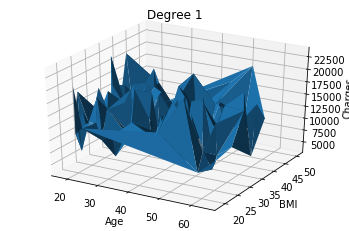

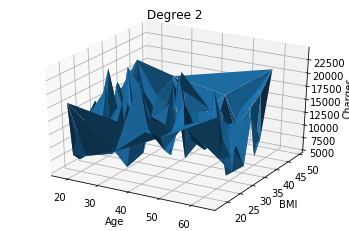

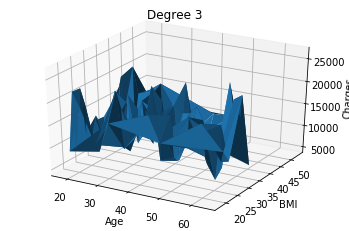

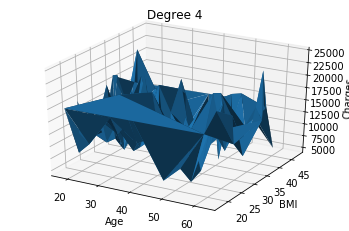

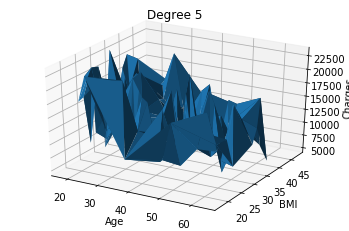

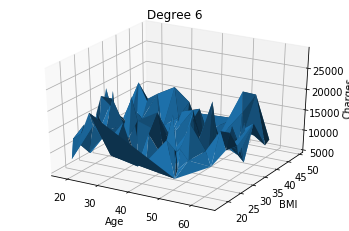

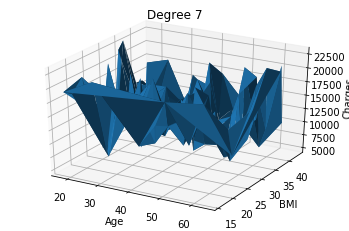

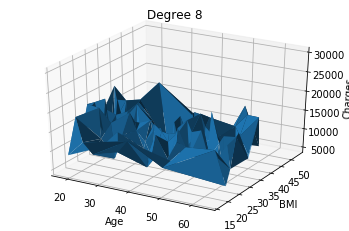

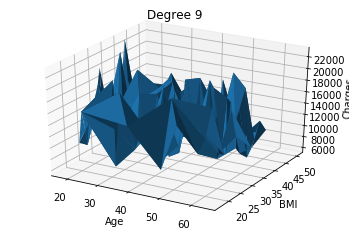

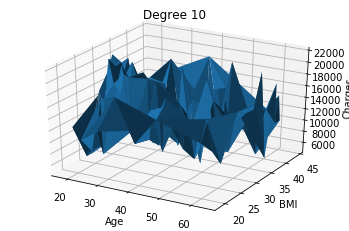

In [90]:
test_data = int(0.9*len(ds))
x = ds[test_data:, 0:2]
x1 = ds[test_data:, 0]
x2 = ds[test_data:, 1]
y = ds[test_data:, 2]

for i in degrees:
    data, mu, sigma = standardize(i)
    wGD, cGD_valid, cGD_test = gradientD(i, 0, 0, 1000, False)
    y_pred = np.dot(data[:,:-1], wGD) 
    y_pred = (y_pred*sigma[-1]) + mu[-1]
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel('Age')
    ax.set_ylabel('BMI')
    ax.set_zlabel('Charges')
    ax.plot_trisurf(x1, x2, y_pred, linewidth=0)
    #ax.plot_trisurf(x1, x2, y, linewidth=0)
    ax.set_title('Degree {}'.format(i));